## Computational Model of $\textit{Major Depressive Disorder (MDD)}$  
#### Kevin Kistermann - Master Thesis [Universität Tübingen, Quantitative Data Science Methods (M.Sc.)]  


  
code partly from here https://github.com/ShirleyBWang/math_model_suicide 
* ["Mathematical and Computational Modeling of Suicide as a Complex Dynamical System" - Shirley Wang, Donald Robinaugh, Alex Millner, Rebecca Fortgang, and Matthew K. Nock](https://osf.io/preprints/psyarxiv/b29cs)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import statistics
from scipy.stats import norm
import random

## 1. Simulation of Stress Stimuli

Desired properties and dynamics of [stress stimuli]:

- In general, stressors should remain relatively low, with small fluctuations up and down.
- However, stressors *should* sometimes show sharp spikes up and down.
- There should be a fair amount of variability in stressors over time (between and within persons).
- Stressors should be above zero.

$\quad \rightarrow \quad$ Geometric Brownian Motion

$SS$ = [stress stimuli] $\quad \rightarrow \quad$ $\Large SS_t = SS_0 \cdot e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}$ $\quad$ with $\quad$ $\sigma = 0.01 \cdot e^{Re + HE}$ $\quad$ $\mu = \frac{\sigma^2}{2}$

$Re$ = [poor interpersonal relationship quality] $\quad \rightarrow \quad$ $\Large Re \sim Beta(1, 1)$  
   
$HE$ = [poor physical health, economic status] $\quad \rightarrow \quad$ $\Large HE \sim Beta(1, 1)$

In [5]:
def geometric_brownian(t, dt, mu, sigma, s0):
    '''
    args:
        t: time period to integrate over
        dt: time step
        mu: drift
        sigma: volatility
        s0: initial value
    '''
    
    SS = np.zeros(t)
    SS[0] = s0
    
    for i in range(0, len(SS) - 1):
        SS[i + 1] = SS[i]*np.exp((mu - ((sigma**2)/2))*dt + sigma*np.random.normal(0, np.sqrt(dt)))
        if SS[i + 1] < 0:
            SS[i + 1] = 0
        if SS[i + 1] > 1:
            SS[i + 1] = 1
    return(SS)

### Example of possible [stress stimuli] values over time:


Re: [0.39764749]
HE: [0.25447935]
starting value: 0.05
sigma: [0.01919619]
mu: [0.00018425]


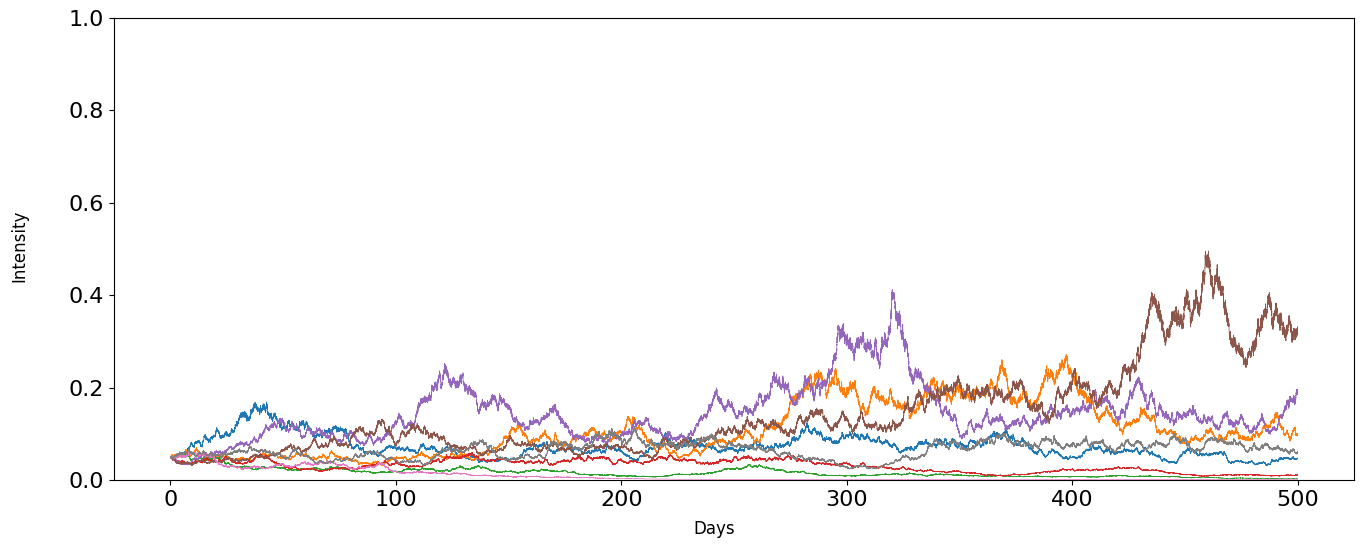

In [6]:
# figure parameters 
fig_width = 16
fig_height = 6
legend_size = 10
axis_size = 14

# set time t and time step dt in minutes
t, dt = 1440*365*10, 0.01 # 1440 min. = 1 Day

np.random.seed(514)

# generating values for [poor interpersonal relationship quality] and [poor physical health, economic status]
Re = np.random.beta(1, 1, 1)
print("Re:", Re)

HE = np.random.beta(1, 1, 1)
print("HE:", HE)

# define initial paramters for Geometric Brownian Motion
s0 = 0.05
print("starting value:", s0)

sigma = 0.01*np.exp(Re + HE) # base-value: 0.01 and max-value : 0.01*exp(2)=0.0738 for sigma
print("sigma:", sigma)

mu = (sigma**2) / 2
print("mu:", mu)

# plot [stress stimuli] for 8 individuals
fig, ax = plt.subplots(1, 1, figsize = (fig_width,fig_height))
for i in range(8):
    SS = geometric_brownian(t, dt, mu, sigma, s0)
    ax.plot((np.arange(t)/1440), SS, linewidth=0.5)
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
fig.text(0.5, 0.02, 'Days', ha='center', fontsize = 12)
fig.text(0.06, 0.5, 'Intensity', va='center', rotation='vertical', fontsize = 12)
#plt.savefig("", dpi = 300, transparent = True)
plt.show()

## Complete Model - Variables & Equations
### Fixed Variables:

$EAE$ = [early adverse experiences] $\quad \rightarrow \quad$ $\Large EAE \sim Beta(1, 1)$

$S$ = [sleep problems] $\quad \rightarrow \quad$ $\Large NCS \sim Beta(1, 1)$ 

### Psychological Variables:

$PS$ = [perceived stress] $\quad \rightarrow \quad$ $\Large PS_{t+1} = SS_{t} \cdot e^{NCS_{t} - C_{t}} + \epsilon_{t}$ $\quad$ with $\quad$ $\epsilon_{t} = \mathcal{N}(0, 0.0001)$

$NCS$ = [negative cognitive schemas] $\quad \rightarrow \quad$  $\Large NCS \sim Beta(1, 5\cdot e^{EAE})$ 

$\Large \frac{dNCS}{d\lambda} = \begin{cases}
  -0.01,  & if \quad mean(C_{t-2 \cdot \lambda,...,t-\lambda}) < mean(C_{t-\lambda,...,t}) \\
  +0.01, & if \quad mean(C_{t-2 \cdot \lambda,...,t-\lambda}) > mean(C_{t-\lambda,...,t}) \\
  0, & otherwise
\end{cases}$

$C$ = [cognitive performance] $\quad \rightarrow \quad$ $\Large C_{t+1}= C_{t} + dt \cdot (\frac{1}{1+e^{PS \cdot (m + L))}} - C_{t})$  

$L$ = [learning, reward processing and memory] $\quad \rightarrow \quad$ $\Large L_{t+1} = L_{t} + dt \cdot (\frac{1}{1 + e^{(-m_{t} + c_{t} + N_{t} + S)}} - L_{t})$ 

### Neurobiological Variables:

$cy$ = [cytokine] $\quad \rightarrow \quad$ $\Large cy_{t+1} = cy_{t} + dt \cdot (\frac{1}{1 + e^{-PS_{t} \cdot (cy_{t} - GR_{t})}} - cy_{t})$

$GR$ = [effective GR] $\quad \rightarrow \quad$ $\Large GR_{t+1} = GR_{t} + dt \cdot (\frac{1}{1+ e^{(c + cy)}} - GR_{t})$

$c$ = [cortisol] $\quad \rightarrow \quad$ $\Large c_{t+1} = c_{t} + dt \cdot (\frac{1}{1+ e^{-(PS_{t} \cdot e^{EAE}) - GR_{t} + 0.8}} - c_{t}$

$m$ = [monomines] $\quad \rightarrow \quad$ $\Large m_{t+1} = m_{t} + dt \cdot (\frac{1}{1 + e^{(c_{t} + cy_{t})}} - m_{t})$

$N$ = [neurodegeneration, decrease in hippocampal volume]   

$\Large \delta_{\theta}=\frac{c_{t-\theta,...,t}}{cy_{t-\theta,...,t}}$ for each period $\theta$

$\Large \frac{dN}{d\theta} = \begin{cases}
  0.001 \cdot \delta_{\theta},  & if \quad \delta_{\theta} > 0.5  \\
  o, & otherwise
\end{cases}$

In [38]:
def model_MDD(t, dt, mu, sigma, s0, NCS, S, EAE):
    
    data = np.zeros([12, t])

    data[0] = geometric_brownian(t, dt, mu, sigma, s0) # [stress stimuli]
    data[1] = np.random.normal(0, 0.0001, t) # epsilon
    
    # Psychological Variables - set initial values
    data[2][0] = 0.05 # [perceived stress] initial value
    data[3][0] = 0.5 # [cognitive performance]
    data[4][0] = 0.35 # [learning, reward processing and memory]
    data[5][0] = NCS # [negative cognitive schema]

    # Neurobiological Variables - set initial values
    data[6][0] = 0.5 # [cytokine]
    data[7][0] = 0.32 # [effective GR]
    data[8][0] = 0.25 # [cortisol]
    data[9][0] = 0.32 # [monomines]
    data[10][0] = 0 # [neurodegeneration]
    data[11][0] = 0 # delta_N
    
    # updating values for each step t
    for i in range(t - 1):
        
        # updating [perceived stress]
        data[2][i + 1] = data[0][i] * np.exp(data[5][i] - data[3][i]) + data[1][i] 
        if data[2][i + 1] > 1:
            data[2][i + 1] = 1
        
        # updating [cognitive performance]
        data[3][i + 1] = data[3][i] + dt * ((1 / (1 + np.exp(data[2][i] * (data[9][i] + data[4][i])))) - data[3][i])
        
        # updating [learning, reward processing and memory]
        data[4][i + 1] = data[4][i] + dt * ((1 / (1 + np.exp((-data[9][i] + data[8][i] + data[10][i] + S)))) - data[4][i]) 
        
        # updating [negative cognitive schema]      
        period_NCS = 1440*7 # period_NCS = lambda
        if i % period_NCS == 0 and i > period_NCS:
            mean_NCS_pre = np.mean(data[3][i-2*period_NCS:i-period_NCS])
            mean_NCS_cur = np.mean(data[3][i-period_NCS:i])
            if mean_NCS_cur > mean_NCS_pre:
                data[5][i + 1] = data[5][i] - 0.01
            elif mean_NCS_cur < mean_NCS_pre:
                data[5][i + 1] = data[5][i] + 0.01 
        else:
            data[5][i + 1] = data[5][i]
        
        # updating [cytokine]
        data[6][i + 1] =  data[6][i] + dt * ((1 / (1 + np.exp(-data[2][i] * (data[6][i] - data[7][i])))) -  data[6][i]) 
        
        # updating [effective GR]
        data[7][i + 1] = data[7][i] + dt * ((1 / (1 + (np.exp(data[8][i] + data[6][i])))) - data[7][i]) 
        
        # updating [cortisol]
        data[8][i + 1] = data[8][i] + dt * ((1 / (1 + np.exp(-(data[2][i] * np.exp(EAE) - data[7][i]) + 0.8))) - data[8][i])
        if data[8][i + 1] > 1:
            data[8][i + 1] = 1
        
        # updating [monomines]
        data[9][i + 1] = data[9][i] + dt * ((1 / (1 + (np.exp(data[8][i] + data[6][i])))) - data[9][i])
        
        # updating [neurodegeneration]
        #data[11][i] = data[8][i] / data[6][i]

        period_N = 1440*30 # period_N = theta
        if i % period_N == 0 and i > period_N:
            mean_c = np.mean(data[8][i-period_N:i])
            mean_cy = np.mean(data[6][i-period_N:i])
            delta = mean_c/mean_cy
            if delta > 0.5:
                data[10][i + 1] = data[10][i] + 0.001 * delta
            elif delta < 0.5:
                data[10][i + 1] = data[10][i]
        else:
            data[10][i + 1] = data[10][i]

    return(data)

EAE: [0.01923988]
Re: [0.4879117]
HE: [0.60551]
NCS: [0.17726415]
S: [0.425605]
sigma: [0.02984469]


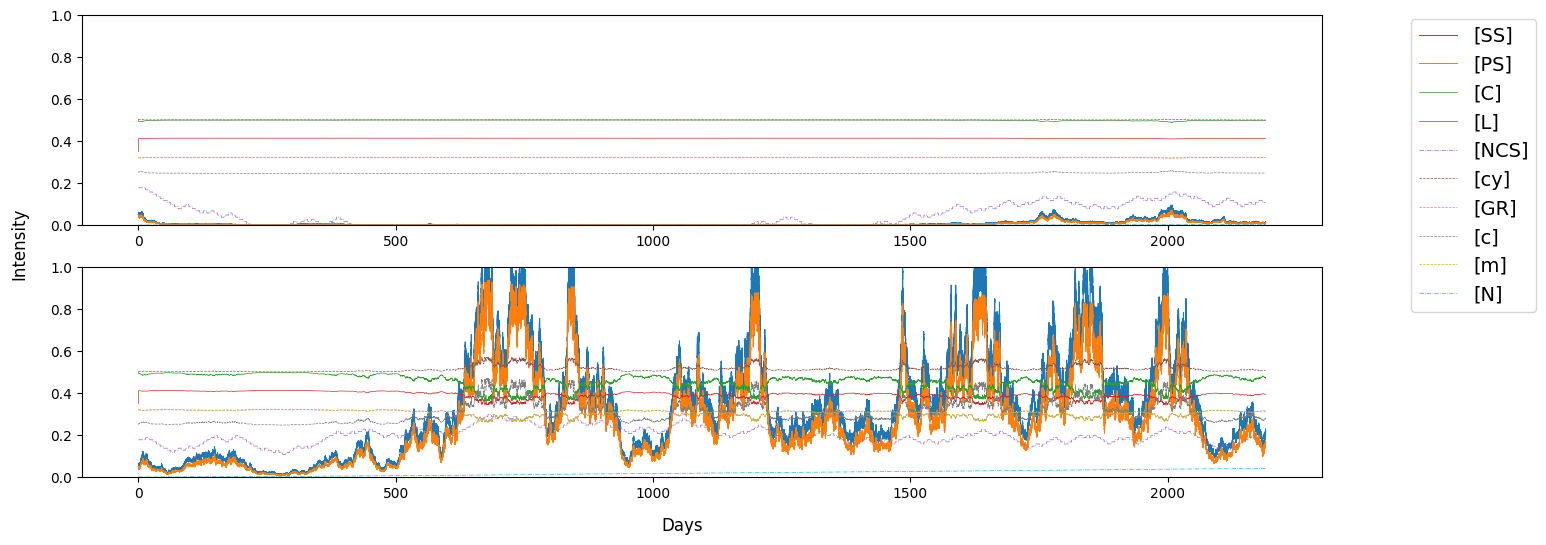

In [54]:
# figure parameters 
fig_width = 16
fig_height = 6
legend_size = 14
axis_size = 12

np.random.seed(48)

# time t and time step dt in minutes
t, dt = 1440*365*6, 0.01 # 1440 min. = 1 Day

# generating values for fixed variables
EAE = np.random.beta(1, 1, 1) # EAE = [early adverse experiences]
print("EAE:", EAE)

Re = np.random.beta(1, 1, 1) # Re = [poor interpersonal relationship quality]
print("Re:", Re)

HE = np.random.beta(1, 1, 1) # HE = [poor physical health, economic status]
print("HE:", HE)

NCS = np.random.beta(1, np.exp(EAE)) # NCS = [negative cognitive schemas]
print("NCS:", NCS)

S = np.random.beta(1, 1, 1) # S = [sleep problems]
print("S:", S)

# define initial paramters for Geometric Brownian Motion
s0 = 0.05
sigma = 0.01*np.exp(Re + HE) # base-value: 0.01 and max-value : 0.01*exp(2)=0.0738 for sigma
print("sigma:", sigma)
mu = (sigma**2) / 2

# plot all variables for 2 individuals
fig, ax = plt.subplots(2, 1, figsize=(fig_width,fig_height), sharey = True)
ax = ax.ravel()
for i in range(2):
    data = model_MDD(t, dt, mu, sigma, s0, NCS, S, EAE)
    ax[i].plot((np.arange(t)/1440), data[0], label = '[SS]', linewidth = 0.75)
    ax[i].plot((np.arange(t)/1440), data[2], label = '[PS]',linewidth = 0.75)
    ax[i].plot((np.arange(t)/1440), data[3], label = '[C]', linewidth = 0.5)
    ax[i].plot((np.arange(t)/1440), data[4], label = '[L]', linewidth = 0.5)
    ax[i].plot((np.arange(t)/1440), data[5], label = '[NCS]', linewidth = 0.5, linestyle='-.')
    ax[i].plot((np.arange(t)/1440), data[6], label = '[cy]', linewidth = 0.5, linestyle='--')
    ax[i].plot((np.arange(t)/1440), data[7], label = '[GR]', linewidth = 0.5, linestyle='--')
    ax[i].plot((np.arange(t)/1440), data[8], label = '[c]', linewidth = 0.5, linestyle='--')
    ax[i].plot((np.arange(t)/1440), data[9], label = '[m]', linewidth = 0.5, linestyle='--')
    ax[i].plot((np.arange(t)/1440), data[10], label = '[N]', linewidth = 0.5, linestyle='-.')
    ax[i].set_ylim([0, 1])
    if i == 0:
        fig.legend(bbox_to_anchor=(1.04, 0.89), fontsize = legend_size)
fig.text(0.5, 0.02, 'Days', ha='center', fontsize = axis_size)
fig.text(0.08, 0.5, 'Intensity', va='center', rotation='vertical', fontsize = axis_size)
#plt.savefig("figures/for_paper/stressor_av_low.png", dpi = 300, transparent = True, bbox_inches='tight')
plt.show()

##### Quick Functional Checks:

In [52]:
# checking if [N] updates correctly --> should only ever increase if "delta" > 0.5, otherwise stay the same (never decrease)
print("initial cy:", data[6][0])
print("initial c:", data[8][0])
print("initial N:", data[10][0])
print("delta,", "mean_c,", "mean_cy,", "N")
period_N = 1440*30
for i in range(t-1):
    if i % period_N == 0 and i > period_N:
            mean_c = np.mean(data[8][i-period_N:i])
            mean_cy = np.mean(data[6][i-period_N:i])
            delta = mean_c/mean_cy

            print(delta, mean_c, mean_cy, data[10][i])

initial cy: 0.5
initial c: 0.25
initial N: 0.0
delta, mean_c, mean_cy, N
0.4963240639669772 0.2484735810611411 0.5006277130211305 0.0
0.49841743818316003 0.24965480913914007 0.5008950129216709 0.0
0.4977438355865506 0.24927441994667013 0.5008086532160072 0.0
0.4991555891803017 0.25007181905836795 0.5009897203976588 0.0
0.5183374149359765 0.260994368022743 0.5035221469686503 0.0
0.5212353493460925 0.2626485452451778 0.5038962640862316 0.0005183374149359765
0.5216215181387645 0.2628679773355779 0.503943890722791 0.001039572764282069
0.529280241395936 0.2672805024258893 0.5049886270474739 0.0015611942824208334
0.5125792325167808 0.25769340895569887 0.5027386843013826 0.0020904745238167696
0.5048423205874512 0.2532914218526186 0.5017238284577259 0.0026030537563335506
0.5025567999903793 0.2519960114327319 0.50142792105799 0.003107896076921002
0.49917330907160934 0.2500816009546583 0.5009915322190888 0.0036104528769113813
0.4969708399120796 0.248838381134662 0.5007102251284696 0.003610452876

In [103]:
# checking if [NCS] update correctly
period_NCS = 1440*7
print("mean_current", "mean_previous", "diff", "NCS")
for i in range(t-1):
    if i % period_NCS == 0 and i > period_NCS:
            mean_pervious = np.mean(data[3][i-2*period_NCS:i-period_NCS])
            mean_current = np.mean(data[3][i-period_NCS:i])
            diff = mean_current - mean_pervious
            NCS = data[5][i]
            print(mean_current, mean_pervious, diff, NCS)


0.48676836694856984 0.4909004830409061 -0.004132116092336269 0.17726415343489854
0.4829463671080063 0.48676836694856984 -0.003821999840563528 0.17826415343489854
0.4799343182536163 0.4829463671080063 -0.0030120488543899926 0.17926415343489854
0.479819230785772 0.4799343182536163 -0.00011508746784433255 0.18026415343489854
0.48122866951915994 0.479819230785772 0.0014094387333879466 0.18126415343489855
0.46924575049749623 0.48122866951915994 -0.011982919021663707 0.18026415343489854
0.4690369515929805 0.46924575049749623 -0.00020879890451575012 0.18126415343489855
0.4663975875580574 0.4690369515929805 -0.0026393640349230973 0.18226415343489855
0.45424214085241527 0.4663975875580574 -0.012155446705642114 0.18326415343489855
0.4563322686612732 0.45424214085241527 0.0020901278088579223 0.18426415343489855
0.4442695838037508 0.4563322686612732 -0.012062684857522377 0.18326415343489855
0.4246990594404426 0.4442695838037508 -0.019570524363308195 0.18426415343489855
0.40053141250749486 0.424699